In [16]:
!pip install json
!pip install numpy

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json
You should consider upgrading via the 'c:\users\tim599\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\tim599\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [17]:
import json
import numpy

In [20]:
#datatype floating number
a = 10
b = 10. #floating 10.0
c = "123" #string
d = True #booling
e = numpy

print (type(a))
print (type(b))
print (type(c))
print (type(d))
print (type(e))

<class 'int'>
<class 'float'>
<class 'str'>
<class 'bool'>
<class 'module'>


In [4]:
t1 = (120, 20)
lst = [10, 10.0, "123", True, numpy] #list = infinite pocket
dic = {"key": "value", 1: 10, 2.: "two"} #dictional

print(t1[1])
print(lst[2])
print(dic["key"])
print(dic[1])
print(dic[2.])

dic[1] = dic[1] + 1
print(dic[1])

20
123
value
10
two
11


In [5]:
str1= "19.1,20,123,你好".split(",")
print(str1)
str1
dic1 = {
        "含氧量": 19.1,
        "氣溫": 20,
        "編號": 123,
        "評論": "你好"
        }

#dic trans into json
js = json.dumps(dic1)

#write into test.json
with open("test.json", "w") as fp:
    fp.write(js) 

#loading json data
with open("test.json", "r") as fp:
    data = json. load(fp)

print(data)

['19.1', '20', '123', '你好']
{'含氧量': 19.1, '氣溫': 20, '編號': 123, '評論': '你好'}


In [8]:
import requests
import json
# CWA-60E2A830-F9D3-444E-A708-FFB0DD6B7ADD

url = "https://opendata.cwa.gov.tw/api/v1/rest/datastore/F-C0032-001"
params = {
	"Authorization": "請輸入你的金鑰",
	"locationName": "輸入位址",
}

response = requests.get(url, params=params)
print(response.status_code)

if response.status_code == 200:
	# print(response.text)
	data = json.loads(response.text)

	location = data["records"]["location"]
	print(f"location => {location}")

else:
	print("Can't get data!")

401
Can't get data!


In [25]:
import base64
from io import BytesIO
import json
# pip3 install pillow
from PIL import Image
import requests
from IPython.display import display

# 若img.save()报错 cannot write mode RGBA as JPEG
# 则img = Image.open(image_path).convert('RGB')
def image_to_base64(image_path):
    img = Image.open(image_path)
    output_buffer = BytesIO()
    img.save(output_buffer, format='JPEG')
    byte_data = output_buffer.getvalue()
    base64_str = base64.b64encode(byte_data)
    return base64_str
img = "1.jpg"
#[image_to_base64(url)]

dic = {}
data_dic = {}

dic["id"] = ["1"]
data_dic["prompt"] ="This is a photo of the room layout, with the premise of not changing the furniture layout, changing its style to 1890s british."
data_dic["img"] =  image_to_base64(img).decode('utf-8')
data_dic["inf_times"] = 30
dic["data"] = data_dic


#print(dic)
with open('Req_data.json', 'w') as fp:
    json.dump(dic, fp)

    
json_data_trans = json.dumps(dic)
# print(json_data_ESA)
res_trs = requests.request("POST", url = "http://163.17.136.69:6666/TransformsAPI", data = json_data_trans)

print(res_trs)

<Response [200]>


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1344x1024 at 0x10AE624C790>


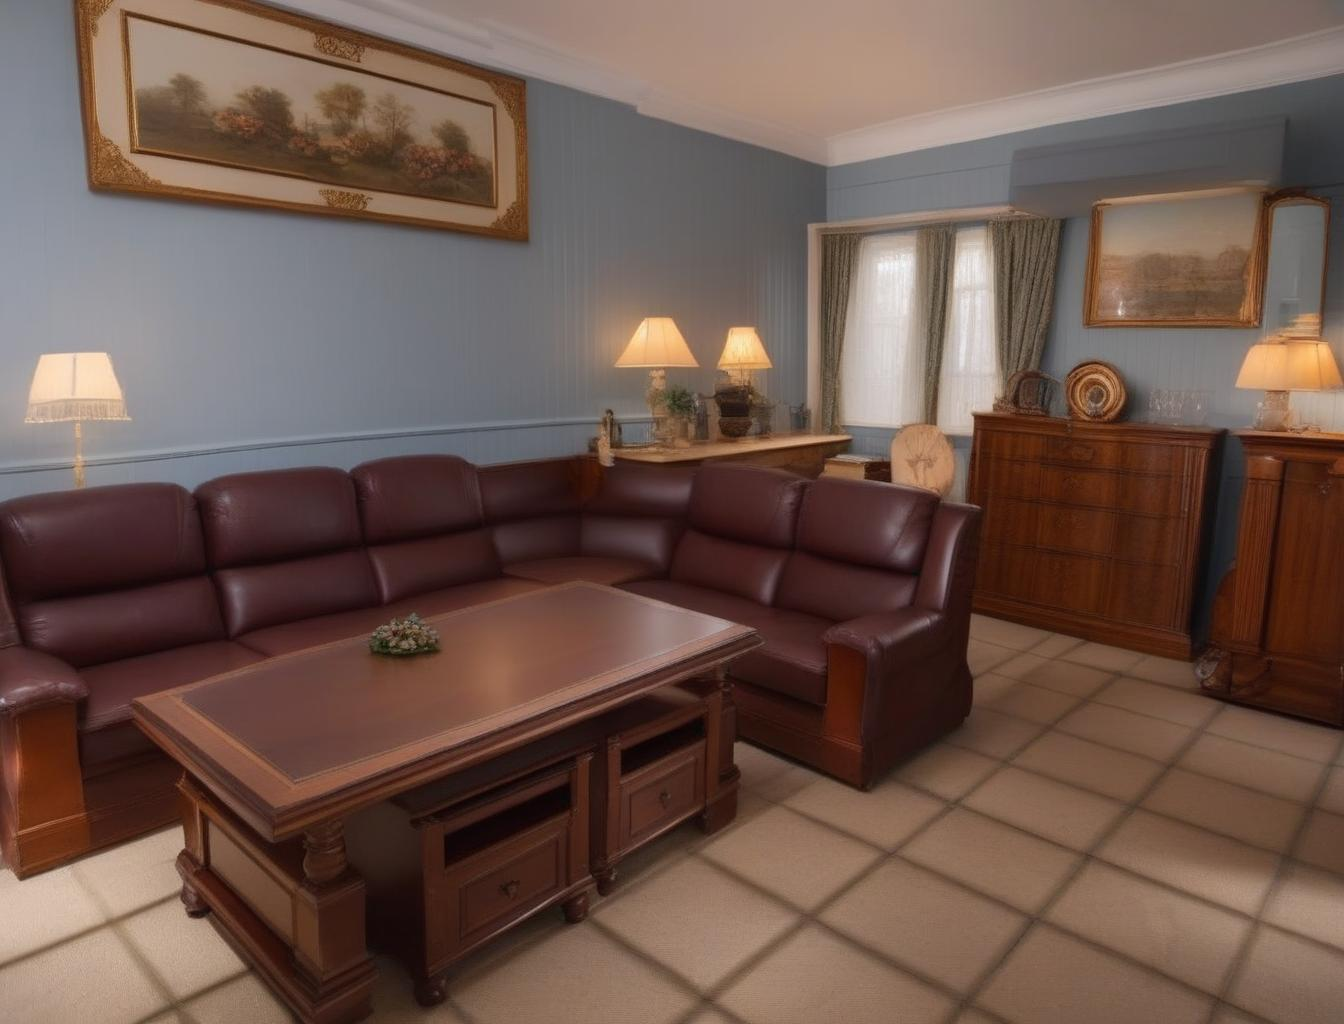

In [26]:
img_data = res_trs.json()["data"]["Image_results"]
img_w = res_trs.json()["data"]["img_wigth"]
img_h = res_trs.json()["data"]["img_height"]


# def im_2_b64(image):
#     buff = BytesIO()
#     image.save(buff, format="JPEG")

#     img_str = base64.b64encode(buff.getvalue())
#     return img_str

# Convert Base64 to Image
def b64_2_img(data):
    buff = BytesIO(base64.b64decode(data))
    return Image.open(buff)

# Test


#img_b64 = im_2_b64(gen_images)
#print(img_b64)

new_img = b64_2_img(img_data)
print(new_img)
display(new_img)